In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

hp = pd.read_csv('hp.csv')
display(hp)

,code,words,favorites,follows,reviews,language,rating,multiple,english,romance,humor,harry,hermione,ron
0,6,1800,9,10,6,English,T,1,1,0,0,0,0,0
1,9,1019,37,8,7,English,K+,0,1,0,0,0,1,0
2,15,2559,1,4,2,English,T,1,1,1,0,0,0,0
3,21,7362,30,17,16,English,T,0,1,0,0,1,0,0
4,25,8947,36,13,24,English,T,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,490,1299,14,7,4,Spanish,K+,0,0,1,1,0,0,0
81,493,9734,10,20,16,English,T,1,1,1,0,0,0,0
82,497,5876,10,30,31,English,T,1,1,1,1,0,1,0
83,498,1063,6,4,10,English,K+,0,1,1,0,0,0,0


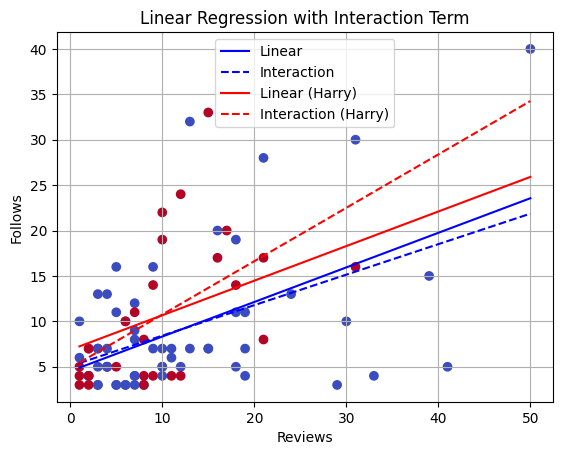

In [123]:
# Fit the linear regression model using a formula
model_linear = sm.OLS.from_formula('follows ~ reviews + harry', data=hp).fit()

# Fit the linear regression model with an interaction term between reviews and harry
model_interaction = sm.OLS.from_formula('follows ~ reviews * harry', data=hp).fit()  

x = np.linspace(hp['reviews'].min(), hp['reviews'].max(), 100)

# Create a new DataFrame for predictions
predictions = pd.DataFrame({'reviews': x, 'harry': 0})
predictions['follows_linear'] = model_linear.predict(predictions)
predictions['follows_interaction'] = model_interaction.predict(predictions) 
predictions['follows_linear_harry'] = model_linear.predict(predictions.assign(harry=1))
predictions['follows_interaction_harry'] = model_interaction.predict(predictions.assign(harry=1))


# Plot the results
plt.scatter(hp['reviews'], hp['follows'], c=hp['harry'], cmap='coolwarm')
plt.plot(predictions['reviews'], predictions['follows_linear'], label='Linear', color='blue')
plt.plot(predictions['reviews'], predictions['follows_interaction'], label='Interaction', color='blue', linestyle='--')
plt.plot(predictions['reviews'], predictions['follows_linear_harry'], label='Linear (Harry)', color='red')
plt.plot(predictions['reviews'], predictions['follows_interaction_harry'], label='Interaction (Harry)', color='red', linestyle='--')
plt.title('Linear Regression with Interaction Term')
plt.xlabel('Reviews')
plt.ylabel('Follows')
plt.legend()
plt.grid()
plt.show()

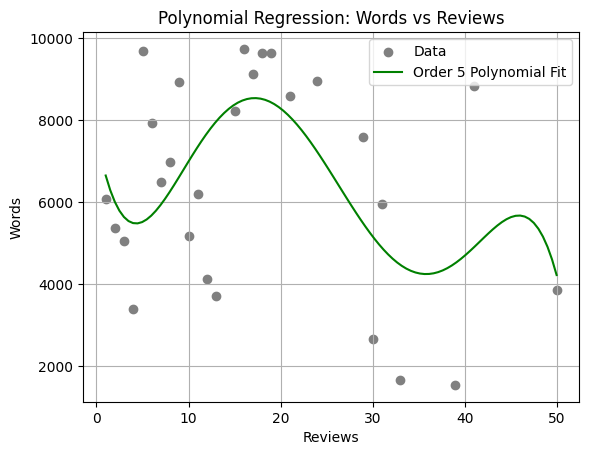

In [124]:
# Fit the polynomial regression model
hp = hp.loc[hp.groupby('reviews')['words'].idxmax()].reset_index(drop=True)
model_poly = sm.OLS.from_formula('words ~ reviews + np.power(reviews, 2) + np.power(reviews, 3)+ np.power(reviews, 4) + np.power(reviews, 5)', data=hp).fit()

# Generate predictions for plotting
x_poly = np.linspace(hp['reviews'].min(), hp['reviews'].max(), 100)
df_poly_pred = pd.DataFrame({'reviews': x_poly})
y_poly_pred = model_poly.predict(df_poly_pred)

# Plot the data and the polynomial fit
plt.scatter(hp['reviews'], hp['words'], c='gray', label='Data')
plt.plot(x_poly, y_poly_pred, color='green', label= f'Order {5} Polynomial Fit')
plt.xlabel('Reviews')
plt.ylabel('Words')
plt.title('Polynomial Regression: Words vs Reviews')
plt.legend()
plt.grid()
plt.show()